In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/train_conv.csv") #del
df = df.sample(frac=1,random_state=100)

In [2]:
data = df.iloc[:,1:].values.astype('float')
labels = df.iloc[:,0].values.astype('float').reshape((-1,1))

In [3]:
del df

In [4]:
import keras
vali_rate = 0.15
end_index = np.floor(len(data) * (1-vali_rate)).astype('int')

data_x = data[:end_index].reshape((-1,48,48,1)) /255.
data_y = keras.utils.to_categorical(labels[:end_index],num_classes=7)
validation_x = data[end_index:].reshape((-1,48,48,1))/255.
validation_y = keras.utils.to_categorical(labels[end_index:],num_classes=7)

Using TensorFlow backend.


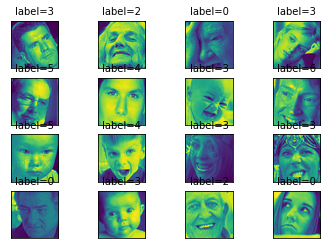

In [7]:
import utils
utils.plot_image_labels(validation_x,data_y)

In [21]:
from keras.layers import Dense,Conv2D,MaxPool2D,AveragePooling2D,Dropout,Flatten
from keras import Sequential
from calls import SaveCall

model = Sequential([Conv2D(32,(4,4),padding='same',activation='relu',input_shape=(48,48,1),name='conv_1'),
                    MaxPool2D(pool_size=(2,2),padding='same',name='maxpool_1'),
                    Conv2D(64,(3,3),activation='relu',padding='same',name='conv_2'),
                    MaxPool2D(pool_size=(2,2),name='maxpool_2'),
                    Conv2D(64,(3,3),activation='relu',padding='same',name='conv_3'),
                    AveragePooling2D(pool_size=(3,3),name='averagepooling_1'),
                    #Dropout(0.2,name='drop_1'),
                    Flatten(name='flatten_1'),
                    Dense(128,activation='relu',name='dense_1'),
                    Dense(64,activation='relu',name='dense_2'),
                    #Dropout(0.2,name='drop_2'),
                    Dense(7,activation='softmax',name='dense_3')
                    ]
                   ,name='sentiment_classification')

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['acc'])
imageGen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                                                        featurewise_std_normalization=False,
                                                        horizontal_flip=True
                                                        #rotation_range=25
                                                        )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 48, 48, 32)        544       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 24, 24, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 12, 12, 64)        36928     
_________________________________________________________________
averagepooling_1 (AveragePoo (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [23]:
from calls import ConsoleCall
save_call = SaveCall("./h5/weights.{epoch}-{batch}-{loss:.5f}.h5",period=300,mode='train_mode')
iepoch = save_call.load(model)

batch_size = 50
epoch = 80
tensorboard_call = keras.callbacks.TensorBoard(log_dir="./log/",batch_size=batch_size,update_freq='batch')
console_call = ConsoleCall(period=50)
model.fit_generator(imageGen.flow(data_x,data_y,batch_size),steps_per_epoch=len(data_x)/batch_size,
                    epochs=epoch,verbose=2,callbacks=[save_call,tensorboard_call,console_call],
                    #pay attention,the standardize function will change the args itself
                    validation_data=(imageGen.standardize(np.copy(validation_x)),validation_y),
                    use_multiprocessing=False,initial_epoch=iepoch)

load weight from file ./h5/weights.50-365-0.44521.h5,start with epoch 50
last logs : {'batch': 365, 'size': 50, 'loss': 0.4452088, 'acc': 0.8}
Epoch 51/80
{'batch': 48, 'size': 50, 'loss': 0.2830499, 'acc': 0.9}
{'batch': 98, 'size': 50, 'loss': 0.48605183, 'acc': 0.76}
{'batch': 148, 'size': 50, 'loss': 0.29277647, 'acc': 0.92}
{'batch': 198, 'size': 50, 'loss': 0.57343215, 'acc': 0.8}
{'batch': 248, 'size': 50, 'loss': 0.32268086, 'acc': 0.9}
{'batch': 298, 'size': 50, 'loss': 0.4363763, 'acc': 0.9}
./h5/weights.50-299-0.41432.h5 has saved
{'batch': 348, 'size': 50, 'loss': 0.2624176, 'acc': 0.9}
{'batch': 398, 'size': 50, 'loss': 0.28840783, 'acc': 0.84}
{'batch': 448, 'size': 50, 'loss': 0.41945347, 'acc': 0.84}
 - 92s - loss: 0.3452 - acc: 0.8761 - val_loss: 1.8035 - val_acc: 0.5925
Epoch 52/80
{'batch': 48, 'size': 50, 'loss': 0.18445933, 'acc': 0.9}
{'batch': 98, 'size': 50, 'loss': 0.19266798, 'acc': 0.92}
./h5/weights.51-110-0.36738.h5 has saved
{'batch': 148, 'size': 50, 'los

KeyboardInterrupt: 